In [78]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv('Iris.csv')

In [80]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
# remove id column of no use
df = df.iloc[:,1:]

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
encoder = LabelEncoder()

In [84]:
df['Species'] = encoder.fit_transform(df['Species'])

In [85]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [86]:
df = df[df['Species'] != 0][['SepalWidthCm', 'PetalLengthCm','Species']]

In [87]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt 

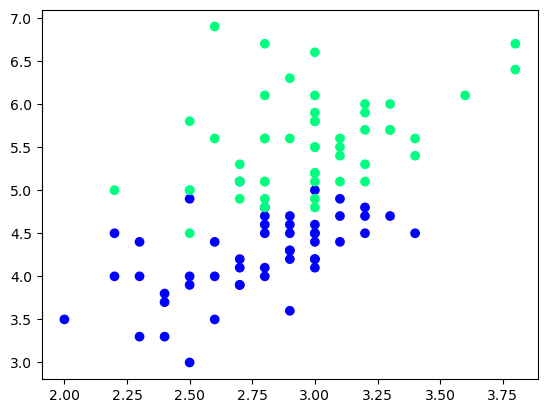

In [89]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [90]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)


In [91]:
df_train

,SepalWidthCm,PetalLengthCm,Species
103,2.9,5.6,2
142,2.7,5.1,2
56,3.3,4.7,1
87,2.3,4.4,1
57,2.4,3.3,1
146,2.5,5.0,2
133,2.8,5.1,2
85,3.4,4.5,1
148,3.4,5.4,2
97,2.9,4.3,1


In [92]:
df_val

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
126,2.8,4.8,2
109,3.6,6.1,2
144,3.3,5.7,2
61,3.0,4.2,1


In [93]:
df_test

,SepalWidthCm,PetalLengthCm,Species
145,3.0,5.2,2
90,2.6,4.4,1
116,3.0,5.5,2
139,3.1,5.4,2
64,2.9,3.6,1


In [94]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

# Case 1 - Bagging

In [95]:
# Data for Tree 1 
df_bag = df_train.sample(8,replace=True)

X  = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
142,2.7,5.1,2
57,2.4,3.3,1
57,2.4,3.3,1
87,2.3,4.4,1
87,2.3,4.4,1
57,2.4,3.3,1
146,2.5,5.0,2
133,2.8,5.1,2


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

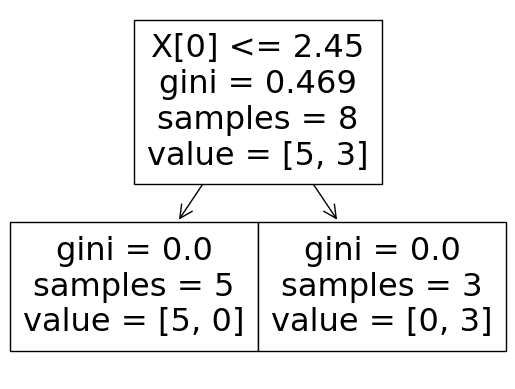

0.6


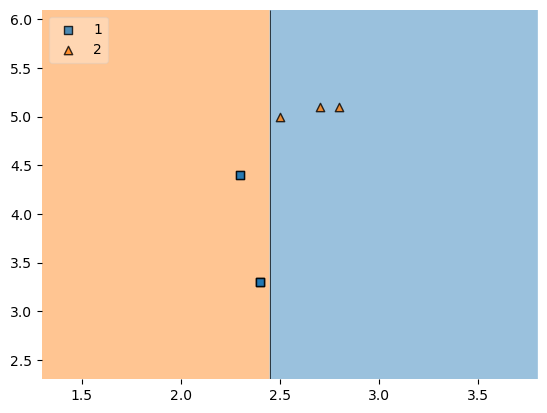

In [97]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

In [98]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

X  = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
85,3.4,4.5,1
56,3.3,4.7,1
148,3.4,5.4,2
56,3.3,4.7,1
87,2.3,4.4,1
103,2.9,5.6,2
56,3.3,4.7,1
56,3.3,4.7,1


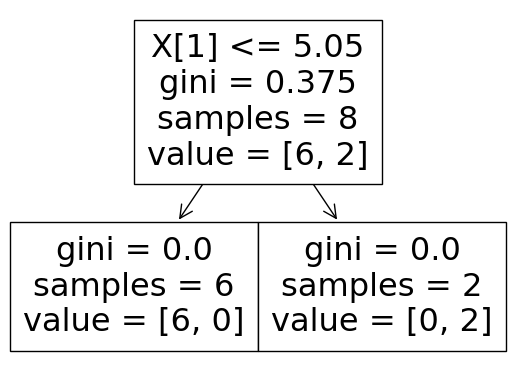

0.8


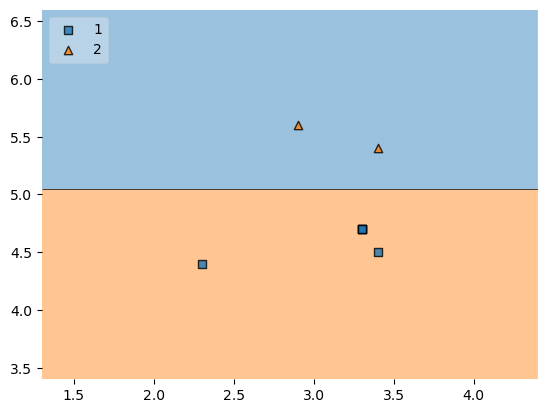

In [99]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [100]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

X  = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
85,3.4,4.5,1
57,2.4,3.3,1
146,2.5,5.0,2
57,2.4,3.3,1
87,2.3,4.4,1
97,2.9,4.3,1
146,2.5,5.0,2
146,2.5,5.0,2


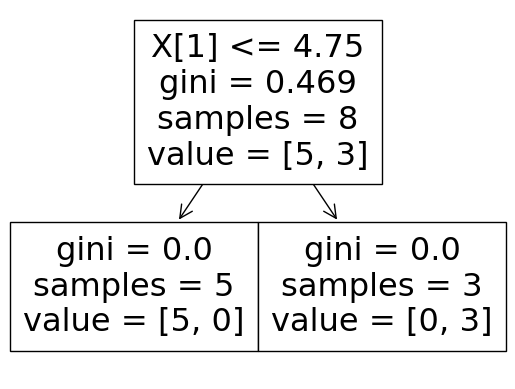

1.0


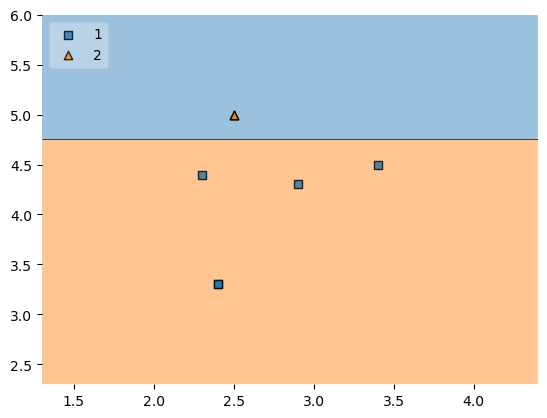

In [101]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [102]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

# Predict

In [103]:
df_test

,SepalWidthCm,PetalLengthCm,Species
145,3.0,5.2,2
90,2.6,4.4,1
116,3.0,5.5,2
139,3.1,5.4,2
64,2.9,3.6,1


In [114]:
print("Predictor 1", dt_bag1.predict(np.array([2.9,4.6]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([2.9,4.6]).reshape(1,2)))
print("Predictor 3", dt_bag3.predict(np.array([2.9,4.6]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [1]


# Types of Bagging

## Pasting

In [115]:
# row sampling but without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
103,2.9,5.6,2
142,2.7,5.1,2
56,3.3,4.7,1
87,2.3,4.4,1
57,2.4,3.3,1
146,2.5,5.0,2
133,2.8,5.1,2
85,3.4,4.5,1
148,3.4,5.4,2
97,2.9,4.3,1


In [116]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
85,3.4,4.5,1
56,3.3,4.7,1
146,2.5,5.0,2
57,2.4,3.3,1
133,2.8,5.1,2
97,2.9,4.3,1
103,2.9,5.6,2
148,3.4,5.4,2


## Random Subspaces

In [117]:
# perform column sampling
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [118]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
8,9,4.4,2.9,1.4,0.2,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
129,130,7.2,3.0,5.8,1.6,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica


In [122]:
df1.sample(2,replace=True, axis=1)

,PetalWidthCm,SepalLengthCm
52,1.5,6.9
8,0.2,4.4
13,0.1,4.3
98,1.1,5.1
74,1.3,6.4
129,1.6,7.2
102,2.1,7.1
76,1.4,6.8
100,2.5,6.3
145,2.3,6.7


# Random Patches

In [123]:
# Perform both row and column sampling
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
8,9,4.4,2.9,1.4,0.2,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
129,130,7.2,3.0,5.8,1.6,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica


In [124]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Id,Species
74,75,Iris-versicolor
145,146,Iris-virginica
52,53,Iris-versicolor
74,75,Iris-versicolor
13,14,Iris-setosa
52,53,Iris-versicolor
74,75,Iris-versicolor
76,77,Iris-versicolor
